# Ejemplo Casificación Multiclases: Noticias

Modelos de Redes Neuronales para clasificar noticias de Reuters en 46 temas exclusivos.

In [1]:
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [7]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [10]:
# Decodificación a texto
word_index = reuters.get_word_index()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
decode_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decode_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [13]:
train_labels[0]

3

In [16]:
import numpy as np

In [17]:
# Codificación
def vectorize_sequence(sequences, dimension=10000):
    res = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        res[i, sequence] = 1
    return res

In [18]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [19]:
# Codificación one-hot para etiquetas
def to_one_hot(labels, dimension=46):
    res = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        res[i, label] = 1
    return res

In [20]:
oh_train_labels = to_one_hot(train_labels)
oh_test_labels = to_one_hot(test_labels)

In [22]:
oh_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
# Manera integrada de One-Hot en Keras
from keras.utils.np_utils import to_categorical

oh_train_labels = to_categorical(train_labels)
oh_test_labels = to_categorical(test_labels)

In [24]:
oh_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

En el ejemplo de clasificación binaria se utilizó un espacio de 16 capas intermedias, sin embargo, para esta clasificación que se compone de 46 etiquetas a clasificar, esto puede ser límitado para que la red pueda captirar la información subyacente de los datos. Capas tan pequeñas pueden generar cuellos de botella para la información, perdiendo información relevante.

In [25]:
from keras import models
from keras import layers

In [27]:
# Definición del modelo
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

La última capa utiliza una activación _softmax_. Esto generará como salida una distribución de probabilidad sobre las 46 dimensiones, donde el output\(i) es la probabilidad que la muestra pertenezca a la clase i. El output de las 46 clases sumará 1.

In [28]:
# Compilar el modelo
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

La mejor función de perdida en este caso es: _categorical_crossentropy_. Mide la distancia entre dos distribuciones de probabilidad.

In [29]:
# Conjunto de validación
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = oh_train_labels[:1000]
partial_y_train = oh_train_labels[1000:]

In [30]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 35ms/step - loss: 2.7425 - accuracy: 0.5397 - val_loss: 1.8140 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 0s 22ms/step - loss: 1.4554 - accuracy: 0.7070 - val_loss: 1.3223 - val_accuracy: 0.7030
Epoch 3/20
16/16 [==============================] - 0s 22ms/step - loss: 1.0464 - accuracy: 0.7786 - val_loss: 1.1665 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 0s 21ms/step - loss: 0.8204 - accuracy: 0.8312 - val_loss: 1.0205 - val_accuracy: 0.7890
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 0.6562 - accuracy: 0.8671 - val_loss: 0.9579 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5247 - accuracy: 0.8933 - val_loss: 0.9090 - val_accuracy: 0.8160
Epoch 7/20
16/16 [==============================] - 0s 21ms/step - loss: 0.4212 - accuracy: 0.9147 - val_loss: 0.8950 - val_accuracy: 0.8190
Epoch 8/20
16

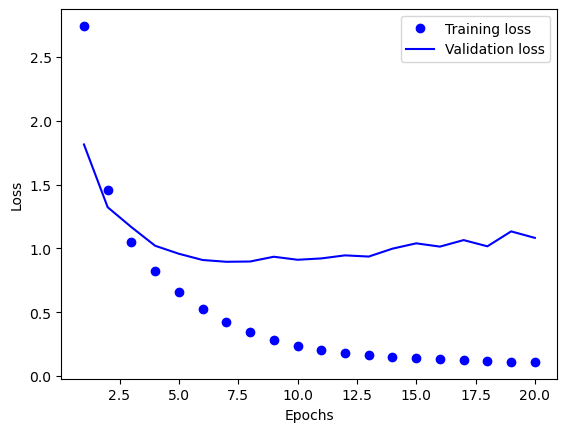

In [32]:
# Pérdida de entrenamiento y validación
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

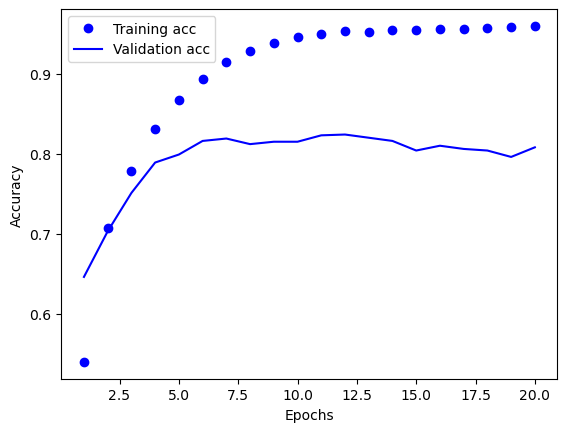

In [34]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Tal como se observa en las imagenes, aproximadamente desde las 6ta y 7ma retropropagación, se alcaza el mínimo y máximo de función de perdida y exactitud, respectivamente.

In [39]:
# Re-entrenamiento del modelo
model.fit(partial_x_train,
         partial_y_train,
         epochs=7,
         batch_size=512,
         validation_data=(x_val, y_val))

Epoch 1/7
16/16 [==============================] - 0s 26ms/step - loss: 0.0925 - accuracy: 0.9570 - val_loss: 1.2441 - val_accuracy: 0.7970
Epoch 2/7
16/16 [==============================] - 0s 23ms/step - loss: 0.0896 - accuracy: 0.9597 - val_loss: 1.3276 - val_accuracy: 0.7850
Epoch 3/7
16/16 [==============================] - 0s 22ms/step - loss: 0.0897 - accuracy: 0.9579 - val_loss: 1.2785 - val_accuracy: 0.7930
Epoch 4/7
16/16 [==============================] - 0s 22ms/step - loss: 0.0876 - accuracy: 0.9604 - val_loss: 1.3232 - val_accuracy: 0.7840
Epoch 5/7
16/16 [==============================] - 0s 24ms/step - loss: 0.0881 - accuracy: 0.9583 - val_loss: 1.3195 - val_accuracy: 0.7880
Epoch 6/7
16/16 [==============================] - 0s 27ms/step - loss: 0.0882 - accuracy: 0.9575 - val_loss: 1.2809 - val_accuracy: 0.7930
Epoch 7/7
16/16 [==============================] - 0s 20ms/step - loss: 0.0880 - accuracy: 0.9583 - val_loss: 1.3384 - val_accuracy: 0.7960


In [40]:
results = model.evaluate(x_test, oh_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.5587 - accuracy: 0.7769


In [41]:
results

[1.5587319135665894, 0.7769367694854736]

Este modelo consigue una exactitud aproximada del 78%

In [42]:
# Generar predicciones para nuevos datos
predictions = model.predict(x_test)

71/71 [==============================] - 0s 1ms/step


In [44]:
# Cada entrada en predictions es un vector de longitud 46
predictions[0].shape

(46,)

In [45]:
# Los coeficientes en este vector suma 1
np.sum(predictions[0])

1.0

In [46]:
# La clase predicha, es decir, con la mayor probabilidad es:
np.argmax(predictions[0])

3

### Formas diferentes de maneras las etiquetas y perdida

El enfoque cambiaría la elección de función de pérdida, que permite etiquetas de enteros, utilizando: _sparse_categorical_crossentropy_

In [47]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [49]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Resumen

- Si trabajamos en clasificación de N clases, la red debe terminar en una capa _Dense_ de tamaño N
- En clasificación multiclase de una sola etiqueta, la red debe utilizar una activación _softmax_, para generar una salida con distribución sobre N clases
- La entropia cruzada categorica es casi siempre la mejor función de pérdida para este tipo de problemas
- Al clasificar datos en una gran cantidad de categorías, se debe evidtar crear cuellos de botella de información en la red en las capas intermedias
